## Code to make conclusions about how the mel spectrogram has 64 frequency bands and how to increase them in order to incorporate more data and reduce data loss. 

The following function is written in an attempt to find the lines of code that defines the final result of the mel spectrogram. The code find places where we need to change the Vggish model in order to make it suitable for our usage. 

In [18]:
import numpy as np
import mel_features
import vggish_params
%matplotlib inline

Going from top to bottom, we see that the function waveform_to_examples is responsible for the spectrogram. In that function definition the first line used the function log_mel_spectrogram which is defined in the mel_features. 

In [3]:
from scipy.io import wavfile
import numpy as np
import mel_features
fs, data = wavfile.read('input.wav')
print(data.shape)

(152092672,)


In [4]:
log_mel = mel_features.log_mel_spectrogram(
      data,
      audio_sample_rate=vggish_params.SAMPLE_RATE,
      log_offset=vggish_params.LOG_OFFSET,
      window_length_secs=vggish_params.STFT_WINDOW_LENGTH_SECONDS,
      hop_length_secs=vggish_params.STFT_HOP_LENGTH_SECONDS,
      num_mel_bins=vggish_params.NUM_MEL_BINS,
      lower_edge_hertz=vggish_params.MEL_MIN_HZ,
      upper_edge_hertz=vggish_params.MEL_MAX_HZ)

fft_length8192
num_samples152092672
num_frames60835
shape(60835, 6250)
strides(5000, 2)
(60835, 6250)
(60835, 6250)
sfft_mangnitute return thing shape (60835, 4097)
Num mel bins128


In [5]:
log_mel.shape 

(60835, 128)

In [6]:
window_length_samples = int(round(250000 * 0.025))
hop_length_samples = int(round(250000 * 0.01))
fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))

In [7]:
spectrogram = mel_features.stft_magnitude(
      data,
      fft_length=fft_length,
      hop_length=hop_length_samples,
      window_length=window_length_samples)

num_samples152092672
num_frames60835
shape(60835, 6250)
strides(5000, 2)
(60835, 6250)
(60835, 6250)


In [8]:
# Here the shape is 60835 which is the number of frames * fft_length/ 2 + 1 
spectrogram.shape

(60835, 4097)

In [9]:
temp = mel_features.spectrogram_to_mel_matrix(
      num_spectrogram_bins=spectrogram.shape[1],
      audio_sample_rate=250000)

Num mel bins20


In [10]:
temp.shape

(4097, 20)

In [11]:
# getting the dot product of both the matrices 
# (60835, 4097) * ((4097, 20) - > (60835, 20)

# is this is the place where we neeed to change 64 so that we get more things 

# ie these changes need to be made in the function - spectrogram_to_mel_matrix 
mel_spectrogram = np.dot(spectrogram, temp)

In [12]:
mel_spectrogram.shape

(60835, 20)

In [13]:
final = np.log(mel_spectrogram + vggish_params.LOG_OFFSET)
print(final.shape)

(60835, 20)


In [14]:
temp2 = mel_features.spectrogram_to_mel_matrix(
      num_mel_bins=64,
      num_spectrogram_bins=spectrogram.shape[1],
      audio_sample_rate=250000)
print(temp2.shape)

# hence we need to change the numeber_mel_bins to something greater than 64 to incororate more data and hence
# reduce data loss. 

# NUM_MEL_BINS = NUM_BANDS this is the line that we need to change in oorder too get more frequencies. 

Num mel bins64
(4097, 64)


In [15]:
fft_length = 2 ** int(np.ceil(np.log(window_length_samples) / np.log(2.0)))

In [28]:
spectrogram = spectrogram.T

In [29]:
spectrogram = spectrogram[::-1,]

/Users/tusharpoddar/opt/anaconda3/envs/final/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


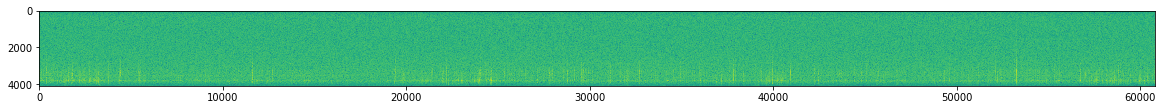

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.imshow(np.log(spectrogram))

In [23]:
spectrogram.max()

10449348.991787687